In [63]:
import setuptools.dist
from tensorflow.keras.layers import StringLookup
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf


import numpy as np
import os

np.random.seed(42)
tf.random.set_seed(42)

In [64]:
base_path = "data/"
words_list = []

words = open(f"{base_path}/words.txt", "r").readlines()
for line in words:
  if line[0] =="#":
    continue
  if line.split(" ")[1] != "err":
    words_list.append(line)

len(words_list)

np.random.shuffle(words_list)

In [65]:
split_idx = int(0.9*len(words_list))
train_samples = words_list[:split_idx]
test_samples = words_list[split_idx:]

val_split_idx = int(0.5 * len(test_samples))
validation_samples = test_samples[:val_split_idx]
test_samples = test_samples[val_split_idx:]

assert len(words_list) == len(train_samples) + len(validation_samples) + len(test_samples)

print(f"Total Training Samples: {len(train_samples)}")
print(f"Total validation samples: {len(validation_samples)}")
print(f"Total test samples: {len(test_samples)}")


Total Training Samples: 86810
Total validation samples: 4823
Total test samples: 4823


In [66]:
base_image_path = os.path.join(base_path, "words")
def get_image_paths_and_labels(samples):
  paths = []
  corrected_samples = []
  for (i, file_line) in enumerate(samples):
    line_split = file_line.strip()
    line_split = line_split.split(" ")

    # Each line split willl have this format for the the corresponding image:
    # part1/part1-part2/part1-part2-part3.png
    image_name = line_split[0]
    partI = image_name.split("-")[0]
    partII = image_name.split("-")[1]
    img_path = os.path.join(
        base_image_path, partI, partI + "-" + partII, image_name + ".png"
    )
    if os.path.getsize(img_path):
      paths.append(img_path)
      corrected_samples.append(file_line.split("\n")[0])

  return paths, corrected_samples

train_img_paths, train_labels = get_image_paths_and_labels(train_samples)
validation_img_paths, validation_labels = get_image_paths_and_labels(validation_samples)
test_img_paths, test_labels = get_image_paths_and_labels(test_samples)




In [67]:
base_image_path = os.path.join("test_images/")
print(base_image_path)

t_images = []
from os import listdir
from os.path import isfile, join

# onlyfiles = [f for f in listdir(base_image_path) if isfile(join(base_image_path, f))]
for f in listdir(base_image_path):
  t_images_path = os.path.join(base_image_path, f)
  t_images.append(t_images_path)

print(t_images)

test_images/
['test_images/line0word2.jpg', 'test_images/line7word9.jpg', 'test_images/line2word3.jpg', 'test_images/line7word0.jpg', 'test_images/line1word2.jpg', 'test_images/line9word6.jpg', 'test_images/line5word3.jpg', 'test_images/line6word1.jpg', 'test_images/line8word4.jpg', 'test_images/line4word5.jpg', 'test_images/line3word5.jpg', 'test_images/line7word8.jpg', 'test_images/line3word4.jpg', 'test_images/line7word7.jpg', 'test_images/line8word8.jpg', 'test_images/line0word5.jpg', 'test_images/line6word2.jpg', 'test_images/line0word11.jpg', 'test_images/line8word6.jpg', 'test_images/line1word5.jpg', 'test_images/line7word2.jpg', 'test_images/line4word6.jpg', 'test_images/line3word2.jpg', 'test_images/line5word5.jpg', 'test_images/line9word1.jpg', 'test_images/line5word6.jpg', 'test_images/line4word3.jpg', 'test_images/line8word2.jpg', 'test_images/line9word8.jpg', 'test_images/line6word7.jpg', 'test_images/line9word5.jpg', 'test_images/line7word4.jpg', 'test_images/line4word0.j

In [68]:
t_images[0:10]

['test_images/line0word2.jpg',
 'test_images/line7word9.jpg',
 'test_images/line2word3.jpg',
 'test_images/line7word0.jpg',
 'test_images/line1word2.jpg',
 'test_images/line9word6.jpg',
 'test_images/line5word3.jpg',
 'test_images/line6word1.jpg',
 'test_images/line8word4.jpg',
 'test_images/line4word5.jpg']

In [69]:
# Sorting string list with numbers

import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

t_images.sort(key=natural_keys)
print(t_images)

['test_images/line0word0.jpg', 'test_images/line0word1.jpg', 'test_images/line0word2.jpg', 'test_images/line0word3.jpg', 'test_images/line0word4.jpg', 'test_images/line0word5.jpg', 'test_images/line0word6.jpg', 'test_images/line0word7.jpg', 'test_images/line0word8.jpg', 'test_images/line0word9.jpg', 'test_images/line0word10.jpg', 'test_images/line0word11.jpg', 'test_images/line0word12.jpg', 'test_images/line0word13.jpg', 'test_images/line0word14.jpg', 'test_images/line1word0.jpg', 'test_images/line1word1.jpg', 'test_images/line1word2.jpg', 'test_images/line1word3.jpg', 'test_images/line1word4.jpg', 'test_images/line1word5.jpg', 'test_images/line1word6.jpg', 'test_images/line1word7.jpg', 'test_images/line2word0.jpg', 'test_images/line2word1.jpg', 'test_images/line2word2.jpg', 'test_images/line2word3.jpg', 'test_images/line2word4.jpg', 'test_images/line2word5.jpg', 'test_images/line2word6.jpg', 'test_images/line3word0.jpg', 'test_images/line3word1.jpg', 'test_images/line3word2.jpg', 'tes

In [70]:
train_img_paths[0:10]

['data/words/e04/e04-030/e04-030-04-08.png',
 'data/words/k02/k02-102/k02-102-05-03.png',
 'data/words/a01/a01-082u/a01-082u-01-04.png',
 'data/words/m01/m01-000/m01-000-07-00.png',
 'data/words/g01/g01-031/g01-031-07-06.png',
 'data/words/f07/f07-081b/f07-081b-01-06.png',
 'data/words/n03/n03-082/n03-082-04-03.png',
 'data/words/g06/g06-018c/g06-018c-04-05.png',
 'data/words/g06/g06-011j/g06-011j-06-06.png',
 'data/words/f04/f04-024/f04-024-01-06.png']

In [71]:
train_labels[0: 10]

['e04-030-04-08 ok 170 1489 1499 120 39 JJ sure',
 'k02-102-05-03 ok 182 836 1623 69 52 PP3A he',
 'a01-082u-01-04 ok 172 1582 1043 234 88 IN during',
 'm01-000-07-00 ok 196 339 1998 75 107 INO of',
 'g01-031-07-06 ok 152 1912 2038 167 59 NN booty',
 'f07-081b-01-06 ok 168 1366 924 350 88 NN gastronomy',
 'n03-082-04-03 ok 165 992 1414 118 135 NN boy',
 'g06-018c-04-05 ok 182 1298 1438 96 58 ATI The',
 'g06-011j-06-06 ok 182 1222 1785 146 95 CC and',
 'f04-024-01-06 ok 183 1104 981 60 70 IN in']

In [72]:
# find maximum length and the size of the vocabulary in the training data.

train_labels_cleaned = []
characters = set()
max_len = 0

for label in train_labels:
  label = label.split(" ")[-1].strip()
  for char in label:
    characters.add(char)

  max_len = max(max_len, len(label))
  train_labels_cleaned.append(label)

print("Maximum length: ", max_len)
print("Vocab size: ", len(characters))

# Check some label samples
train_labels_cleaned[:10]

Maximum length:  21
Vocab size:  78


['sure',
 'he',
 'during',
 'of',
 'booty',
 'gastronomy',
 'boy',
 'The',
 'and',
 'in']

Now we clean the validation and the test labels as well

In [73]:
def clean_labels(labels):
  cleaned_labels = []
  for label in labels:
    label = label.split(" ")[-1].strip()
    cleaned_labels.append(label)
  return cleaned_labels

validation_labels_cleaned = clean_labels(validation_labels)
test_labels_cleaned = clean_labels(test_labels)


In [74]:
ff = list(characters)

In [75]:
import pickle
with open("characters", "rb") as fp:   # Unpickling
    b = pickle.load(fp)
    print(b)

['L', 'E', '"', '0', '2', 's', 'l', 'w', 'p', 'P', 'H', '/', 'O', 'V', 'f', '!', 'X', 'v', 'M', ':', 'N', '4', '3', "'", 'F', 'J', '(', 'K', '+', 'o', '#', 'I', 'r', '9', ',', '&', '8', 'B', '*', 'Q', 'g', '.', 'W', 'j', 'q', 'm', 'c', '5', ';', '7', 'U', 'h', 'u', 'a', ')', 'R', 'i', 'C', 'z', 'n', '-', 'Y', 'D', 'x', 'd', 'S', 'y', 'Z', 'e', 'k', 'G', '?', 'T', 'A', '6', 't', '1', 'b']


**Building the character vocabulary**

In [76]:
AUTOTUNE = tf.data.AUTOTUNE

# Maping characaters to integers
char_to_num = StringLookup(vocabulary=b, mask_token=None)

#Maping integers back to original characters
num_to_chars = StringLookup(vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True)


- Resizing images without distortion

Instead of square images, many OCR models work with rectangular images. This will become clearer in a moment when we will visualize a few
‘samples from the dataset. While aspect-unaware resizing square images does not introduce a significant amount of distortion this is not the
case for rectangular images. But resizing images to a uniform size is a requirement for mini-batching. So we need to perform our resizing such
that the following criteria are met:

+ Aspect ratio is preserved.

+ Content of the images is not affected.



In [77]:
def distortion_free_resize(image, img_size):
  w, h = img_size
  image = tf.image.resize(image, size=(h, w), preserve_aspect_ratio=True)

  # Check tha amount of padding needed to be done.
  pad_height = h - tf.shape(image)[0]
  pad_width = w - tf.shape(image)[1]

  # only necessary if you want to do same amount of padding on both sides.
  if pad_height % 2 != 0:
    height = pad_height // 2
    pad_height_top = height +1
    pad_height_bottom = height
  else:
    pad_height_top = pad_height_bottom = pad_height // 2

  if pad_width % 2 != 0:
    width = pad_width // 2
    pad_width_left = width + 1
    pad_width_right = width
  else:
    pad_width_left = pad_width_right = pad_width // 2

  image = tf.pad(
      image, paddings=[
          [pad_height_top, pad_height_bottom],
          [pad_width_left, pad_width_right],
          [0, 0],
      ],
  )
  image = tf.transpose(image, perm=[1,0,2])
  image = tf.image.flip_left_right(image)
  return image


In [78]:
batch_size = 64
padding_token = 99
image_width = 128
image_height = 32

def preprocess_image(image_path, img_size=(image_width, image_height)):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_png(image, 1)
  image = distortion_free_resize(image, img_size)
  image = tf.cast(image, tf.float32) / 255.0
  return image

def vectorize_label(label):
  label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
  length = tf.shape(label)[0]
  pad_amount = max_len - length
  label = tf.pad(label, paddings=[[0, pad_amount]], constant_values=padding_token)
  return label

 
def process_images_labels(image_path, label):
  image = preprocess_image(image_path)
  label = vectorize_label(label)
  return {"image": image, "label": label}
  
def prepare_dataset(image_paths, labels):
  dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels)).map(
    process_images_labels, num_parallel_calls=AUTOTUNE
  )

  return dataset.batch(batch_size).cache().prefetch(AUTOTUNE)


In [79]:
train_ds = prepare_dataset(train_img_paths, train_labels_cleaned)
validation_ds = prepare_dataset(validation_img_paths, validation_labels_cleaned)
test_ds = prepare_dataset(test_img_paths, test_labels_cleaned)

In [80]:
print(train_ds)
print(type(train_ds))

for element in train_ds.take(1):
    print(element['image'].shape)
    print(element['label'].shape)


<_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, None, 1), dtype=tf.float32, name=None), 'label': TensorSpec(shape=(None, None), dtype=tf.int64, name=None)}>
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
(64, 128, 32, 1)
(64, 21)


2024-11-16 01:12:34.419583: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [81]:
# Testing inference images
batch_size = 64
padding_token = 99
image_width = 128
image_height = 32

def preprocess_image(image_path, img_size=(image_width, image_height)):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_png(image, 1)
  image = distortion_free_resize(image, img_size)
  image = tf.cast(image, tf.float32) / 255.0
  return image

def process_images_2(image_path):
  image = preprocess_image(image_path)
  # label = vectorize_label(label)
  return {"image": image}
  
def prepare_test_images(image_paths):
  dataset = tf.data.Dataset.from_tensor_slices((image_paths)).map(
    process_images_2, num_parallel_calls=AUTOTUNE
  )

  # return dataset
  return dataset.batch(batch_size).cache().prefetch(AUTOTUNE)

inf_images = prepare_test_images(t_images)

2024-11-16 01:12:34.560784: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


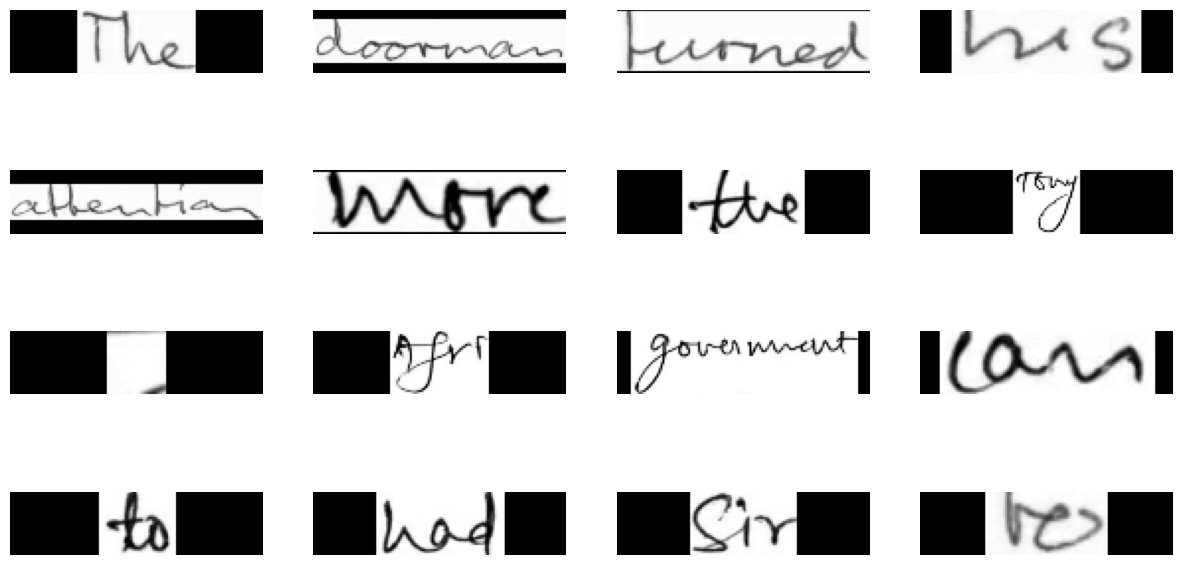

In [82]:
# Visualize test images 

from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

# Ensure matplotlib is imported
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Loop through the dataset
for data in inf_images.take(1):
    images = data["image"]

    # Ensure the number of images doesn't exceed the available data
    num_images = min(16, images.shape[0])  # Limit to 16 or less
    _, ax = plt.subplots(4, 4, figsize=(15, 8))  # Create a grid for up to 16 images
    ax = ax.flatten()  # Flatten the axes array for easier indexing

    for i in range(num_images):
        img = images[i]
        img = tf.image.flip_left_right(img)  # Flip the image horizontally
        img = tf.transpose(img, perm=[1, 0, 2])  # Transpose for visualization
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)  # Scale and convert to uint8
        img = img[:, :, 0]  # Take the first channel for grayscale

        # Display the image
        ax[i].imshow(img, cmap="gray")
        ax[i].axis("off")  # Hide axes

    # Hide any remaining unused axes
    for j in range(num_images, 16):
        ax[j].axis("off")

    plt.show()


2024-11-16 01:12:34.819762: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


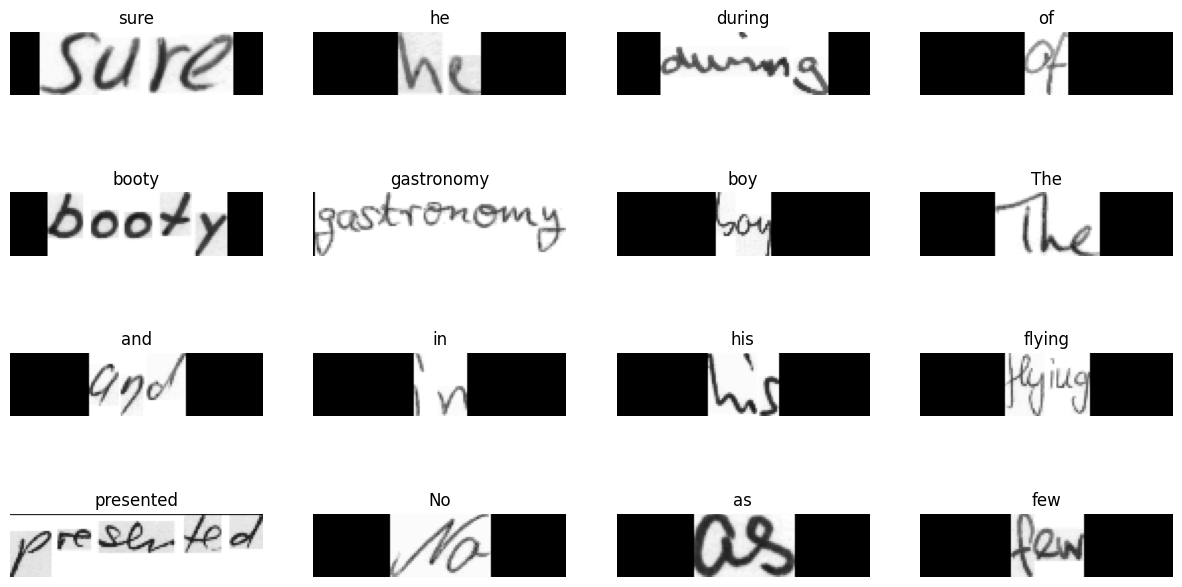

In [83]:
for data in train_ds.take(1):
  images, labels = data["image"], data["label"]
  _, ax = plt.subplots(4, 4, figsize=(15, 8))

  for i in range(16): 
    img = images[i]
    # print(img.shape)
    img = tf.image.flip_left_right(img)
    img = tf.transpose(img, perm=[1, 0, 2])
    img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
    img = img[:, :, 0]

    # Gather indices where Label!= padding token
    label = labels[i]
    indices = tf.gather(label, tf.where(tf.math.not_equal(label, padding_token)))
    # Convert to string.
    label = tf.strings.reduce_join(num_to_chars(indices))
    label = label.numpy().decode("utf-8")

    ax[i // 4, i % 4].imshow(img, cmap="gray")
    ax[i // 4, i % 4].set_title(label)
    ax[i // 4, i % 4].axis("off")

  plt.show()

In [84]:
class CTCLayer(keras.layers.Layer):

  def __init__(self, name=None):
    super().__init__(name=name)
    self.loss_fn = tf.keras.backend.ctc_batch_cost  

  def call(self, y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    loss = self.loss_fn(y_true, y_pred, input_length, label_length)
    self.add_loss(loss)

    return y_pred

In [85]:
def build_model():
  input_img = keras.Input(shape=(image_width, image_height, 1), name="image")
  labels = keras.layers.Input(name="label", shape=(None,))

  # first conv block
  x = keras.layers.Conv2D(
      32, (3,3), activation = "relu",
      kernel_initializer="he_normal",
      padding="same",
      name="Conv1"
  )(input_img)
  x = keras.layers.MaxPooling2D((2,2), name="pool1")(x)

  # Second conv block
  x = keras.layers.Conv2D(
      64, (3,3), activation = "relu", kernel_initializer="he_normal",
      padding="same",
      name="Conv2"
  )(x)
  x = keras.layers.MaxPooling2D((2,2), name="pool2")(x)

  # We have two maxpool layers with pool size and strides 2
  # Hence downsampled feature maps are 4x smaller the number of filters in the last layer is 64, 
  # Reshape accordingly before passing the output to the RNN part of the model.
  
  new_shape = ((image_width // 4), (image_height // 4) * 64)
  x = keras.layers.Reshape(target_shape=new_shape, name="reshape")(x)
  x = keras.layers.Dense(64, activation="relu", name="dense1")(x)
  x = keras.layers.Dropout(0.2)(x)

  # Bi-LSTM
  x = keras.layers.Bidirectional(
      keras.layers.LSTM(128, return_sequences=True, dropout=0.25)
  )(x)
  x = keras.layers.Bidirectional(
    keras.layers.LSTM(64, return_sequences=True, dropout=0.25)
  )(x)
  # +2 is to account for the two special tokens introduced by the CTC loss.
  x = keras.layers.Dense(
    len(char_to_num.get_vocabulary()) + 2, activation="softmax", name="dense2"
  )(x)
  # Add CTC layer for calculating CTC Loss at each step.
  output = CTCLayer(name="ctc_loss")(labels, x)

  # Define the model.
  model = keras.models.Model(
      inputs=[input_img, labels], outputs=output, name="handwriting_recognizer"
  )
  
  # optimizer
  opt = keras.optimizers.Adam()
  # Compile the model and return
  model.compile(optimizer=opt)
  return model

model = build_model()
model.summary()
     

Model: "handwriting_recognizer"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image (InputLayer)  │ (None, 128, 32,   │          0 │ -                 │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 128, 32,   │        320 │ image[0][0]       │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 64, 16,    │          0 │ Conv1[0][0]       │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv2 (Conv2D)      │ (None, 64, 16,    │     18,496 │ pool1[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool2               │ (None, 32, 8, 64) │          0 │ Conv2[0][0]       │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 32, 512)   │          0 │ pool2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense1 (Dense)      │ (None, 32, 64)    │     32,832 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32, 64)    │          0 │ dense1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_4     │ (None, 32, 256)   │    197,632 │ dropout_2[0][0]   │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_5     │ (None, 32, 128)   │    164,352 │ bidirectional_4[… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ label (InputLayer)  │ (None, None)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense2 (Dense)      │ (None, 32, 81)    │     10,449 │ bidirectional_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ctc_loss (CTCLayer) │ (None, 32, 81)    │          0 │ label[0][0],      │
│                     │                   │            │ dense2[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 424,081 (1.62 MB)

 Trainable params: 424,081 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

In [86]:
validation_images = []
validation_labels = []

for batch in validation_ds:
  validation_images.append(batch["image"])
  validation_labels.append(batch["label"])



In [87]:
def calculate_edit_distance(labels, predictions):
  # Get a single batch and convert its labels to sparse tensors.
  sparse_labels = tf.cast(tf.sparse.from_dense(labels), dtype=tf.int64)

  input_len = np.ones(predictions.shape[0]) * predictions.shape[1]

  predictions_decoded = keras.ops.nn.ctc_decode(predictions, sequence_lengths=input_len)[0][0][:, :max_len]
  sparse_predictions = tf.cast(
    tf.sparse.from_dense(predictions_decoded), dtype=tf.int64
  )

  # Compute individual edit distances and average them out.
  edit_distances = tf.edit_distance(
    sparse_predictions, sparse_labels, normalize=False
  )
  return tf.reduce_mean(edit_distances)

class EditDistanceCallback(keras.callbacks.Callback):
  def __init__(self, pred_model):
    super().__init__()
    self.prediction_model = pred_model
  def on_epoch_end(self, epoch, logs = None):
    edit_distances = []

    for i in range(len(validation_images)):
      labels = validation_labels[i]
      predictions = self.prediction_model.predict(validation_images[i])
      edit_distances.append(calculate_edit_distance(labels, predictions).numpy())
    print(f"Mean edit distance for each {epoch + 1}: {np.mean(edit_distances): .4f}")
 


In [88]:
# prediction_model = keras.models.Model(
#     inputs=model.input[0],
#     outputs=model.get_layer(name="dense2").output
# )

# edit_distance_callback = EditDistanceCallback(prediction_model)

# history = model.fit(
#     train_ds,
#     validation_data=validation_ds,
#     epochs=1,
#     callbacks=[edit_distance_callback],
# )


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step s/step - loss: 1083.40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

In [89]:
# Saving the model

# model.save_weights('ocr_model_v4.h5')
# prediction_model.save_weights('ocr_model_v5.h5')

# # Below is working saved models
# model.save("ocr_model_v8.h5")
# prediction_model.save("ocr_model_50_epoch.h5")
     

# Test

(64, 128, 32, 1)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


2024-11-16 01:15:08.151620: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


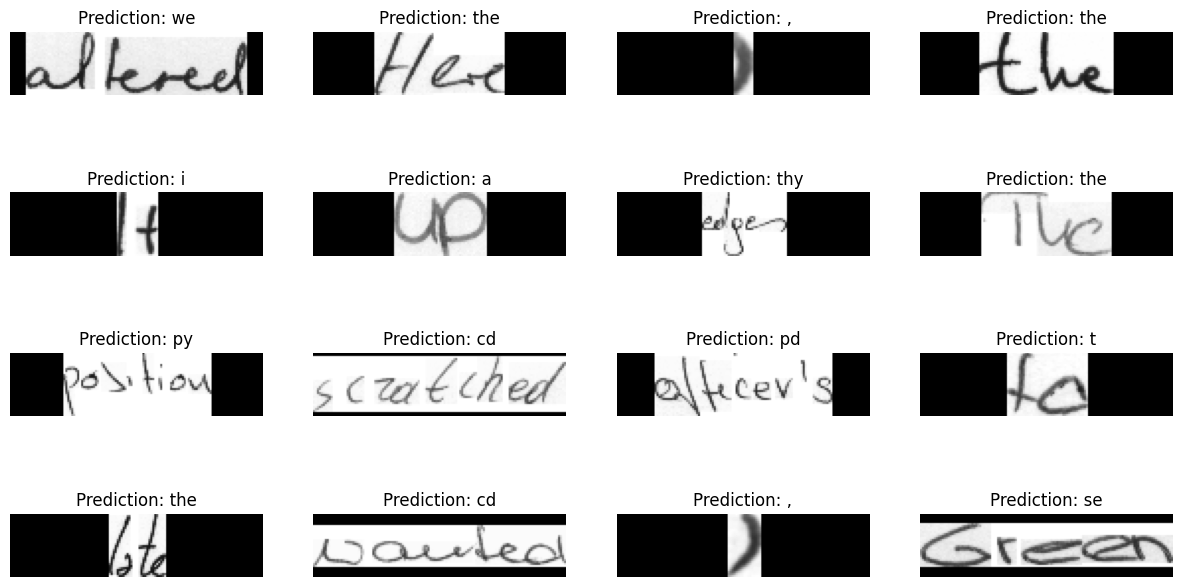

In [90]:
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_len
    ]

    output_text = []

    for res in results:
      res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
      res = tf.strings.reduce_join(num_to_chars(res)).numpy().decode("utf-8")
      output_text.append(res)

    return output_text


for batch in test_ds.take(1):
    batch_images = batch["image"]
    print(batch_images.shape)

    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    for i in range(16):
      img = batch_images[i]
      img = tf.image.flip_left_right(img)
      img = tf.transpose(img, perm=[1, 0, 2])
      img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
      img = img[:, :, 0]

      title = f"Prediction: {pred_texts[i]}"
      ax[i // 4, i % 4].imshow(img, cmap = "gray")
      ax[i // 4, i % 4].set_title(title)
      ax[i // 4, i % 4].axis("off")

    plt.show()

In [91]:
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_len
    ]

    output_text = []

    for res in results:
        res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
        res = tf.strings.reduce_join(num_to_chars(res)).numpy().decode("utf-8")
        output_text.append(res)

    return output_text

def calculate_accuracy(prediction_model, test_dataset, padding_token, num_to_chars):
    total_samples = 0
    correct_predictions = 0

    for batch in test_dataset:
        images, labels = batch["image"], batch["label"]
        predictions = prediction_model.predict(images)
        pred_texts = decode_batch_predictions(predictions)

        for i in range(len(labels)):
            true_label = labels[i]
            true_label_indices = tf.gather(true_label, tf.where(tf.math.not_equal(true_label, padding_token)))
            true_label_str = tf.strings.reduce_join(num_to_chars(true_label_indices)).numpy().decode("utf-8")

            if pred_texts[i] == true_label_str:
                correct_predictions += 1
            total_samples += 1

    accuracy = correct_predictions / total_samples * 100
    return accuracy

accuracy = calculate_accuracy(
    prediction_model=prediction_model,
    test_dataset=test_ds,
    padding_token=padding_token,
    num_to_chars=num_to_chars,
)

print(f"Word-level Accuracy on Test Set: {accuracy:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━

In [92]:
def calculate_character_level_accuracy(prediction_model, test_dataset, padding_token, num_to_chars):
    total_characters = 0
    correct_characters = 0

    for batch in test_dataset:
        images, labels = batch["image"], batch["label"]
        predictions = prediction_model.predict(images)
        pred_texts = decode_batch_predictions(predictions)

        for i in range(len(labels)):
            true_label = labels[i]
            true_label_indices = tf.gather(true_label, tf.where(tf.math.not_equal(true_label, padding_token)))
            true_label_str = tf.strings.reduce_join(num_to_chars(true_label_indices)).numpy().decode("utf-8")
            
            predicted_text = pred_texts[i]

            min_length = min(len(true_label_str), len(predicted_text))
            correct_chars = sum(1 for j in range(min_length) if true_label_str[j] == predicted_text[j])
            correct_characters += correct_chars
            total_characters += len(true_label_str)

    character_accuracy = correct_characters / total_characters * 100
    return character_accuracy

character_accuracy = calculate_character_level_accuracy(
    prediction_model=prediction_model,
    test_dataset=test_ds,
    padding_token=padding_token,
    num_to_chars=num_to_chars,
)

print(f"Character-level Accuracy on Test Set: {character_accuracy:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━

# Inference

In [93]:
custom_objects = {"CTCLayer": CTCLayer}

In [94]:
reconstructed_model = keras.models.load_model("epoch50_our_ocr_pred_model.h5", custom_objects=custom_objects)

In [95]:
prediction_model = keras.models.Model(
  reconstructed_model.get_layer(name="image").output, reconstructed_model.get_layer(name="dense2").output
)

(64, 128, 32, 1)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step 


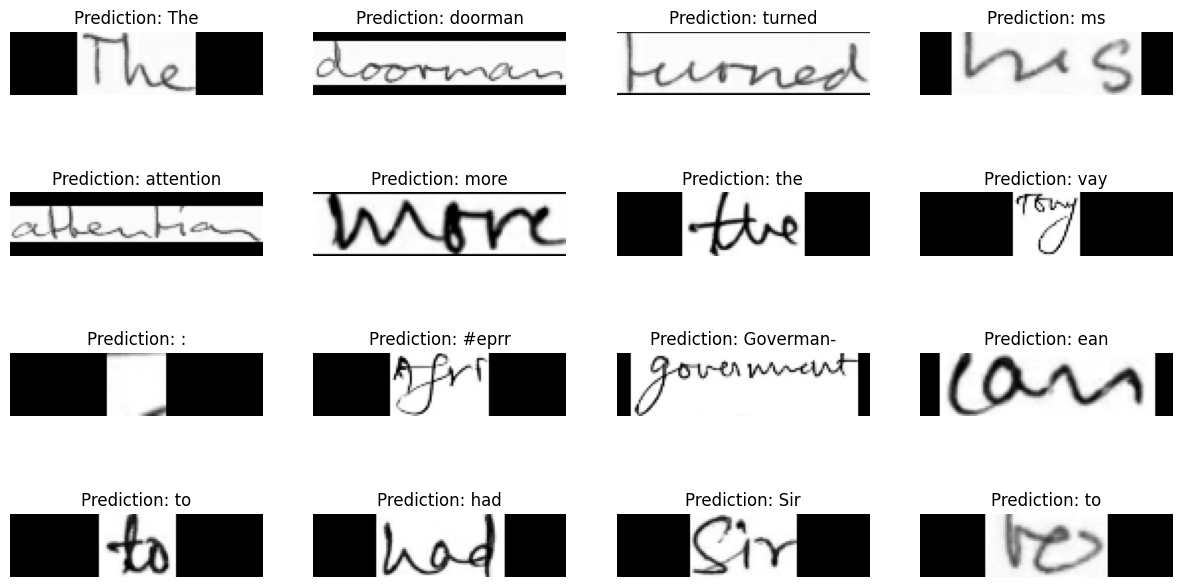

(28, 128, 32, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


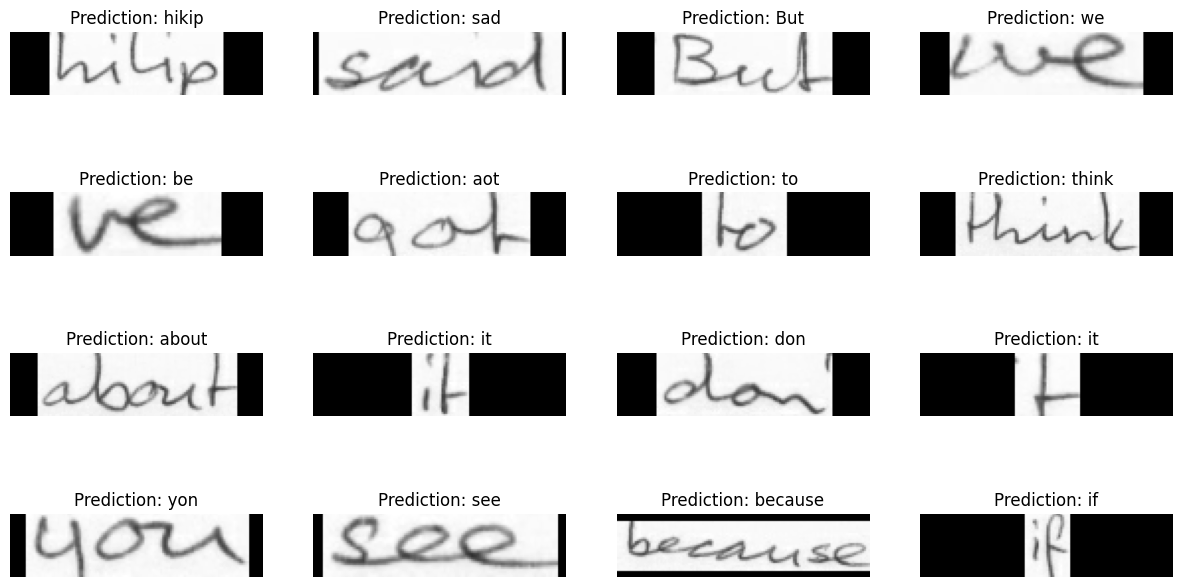

2024-11-16 01:15:34.898328: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [96]:
pred_test_text = []

def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_len
    ]

    output_text = []

    for res in results:
      res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
      res = tf.strings.reduce_join(num_to_chars(res)).numpy().decode("utf-8")
      output_text.append(res)

    return output_text


for batch in inf_images.take(3):
    batch_images = batch["image"]
    print(batch_images.shape)

    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)
    pred_test_text.append(pred_texts)

    for i in range(16):
      img = batch_images[i]
      img = tf.image.flip_left_right(img)
      img = tf.transpose(img, perm=[1, 0, 2])
      img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
      img = img[:, :, 0]

      title = f"Prediction: {pred_texts[i]}"
      ax[i // 4, i % 4].imshow(img, cmap = "gray")
      ax[i // 4, i % 4].set_title(title)
      ax[i // 4, i % 4].axis("off")

    plt.show()


In [97]:
flat_list = [item for sublist in pred_test_text for item in sublist]
print(flat_list)

['The', 'doorman', 'turned', 'ms', 'attention', 'more', 'the', 'vay', ':', '#eprr', 'Goverman-', 'ean', 'to', 'had', 'Sir', 'to', 'the', 'next', 'bed', 'ened', 'emerger', 'from', 'the', 'dark', 'and', 'we', 'went', 'an', 'toaether', 'to', 'the', 'station', 'the', 'dhildren', 'silent', 'because', 'of', 'the', 'cruelty', 'of', 'the', 'world', 'Finally', 'Catherine', 'sad', 'her', 'eyes', 'wet', 'agan', 'think', 'its', 'alt', 'abodutely', 'beasthyy', 'and', 'I', 'can', 'It', 'bear', 'tothink', 'about', 'it', 'And', 'pr', 'hikip', 'sad', 'But', 'we', 'be', 'aot', 'to', 'think', 'about', 'it', 'don', 'it', 'yon', 'see', 'because', 'if', 'we', "don't", 'itll', 'just', 'so', 'on', 'and', 'an', 'don', 'A', 'non', 'see']


In [98]:
import textwrap

sentence = ' '.join(flat_list)

wrapped_text = textwrap.fill(sentence, width=80)

print(wrapped_text)


The doorman turned ms attention more the vay : #eprr Goverman- ean to had Sir to
the next bed ened emerger from the dark and we went an toaether to the station
the dhildren silent because of the cruelty of the world Finally Catherine sad
her eyes wet agan think its alt abodutely beasthyy and I can It bear tothink
about it And pr hikip sad But we be aot to think about it don it yon see because
if we don't itll just so on and an don A non see
